# BigMart Sales Data

### 1. Importing Required Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline 
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

from sklearn.model_selection  import cross_val_score as CVS

## 2. Loading the Data and Data Analysis

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bigmart-sales-linear-regression/BigMartTrain.csv
/kaggle/input/bigmart-sales-linear-regression/BigMartTest.csv


In [3]:
path_tr='/kaggle/input/bigmart-sales-linear-regression/BigMartTrain.csv'
path_te='/kaggle/input/bigmart-sales-linear-regression/BigMartTest.csv'

In [4]:
train_df = pd.read_csv(path_tr)
test_df = pd.read_csv(path_te)

In [5]:
train_df.shape, test_df.shape

((8523, 12), (5681, 11))

> 8523 rows X 12 columns in BigMart Train

In [6]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


> Columns Item_Weight, Outlet_Size have null values

In [11]:
# No. of missing/null values in train data
# train_df.isnull().sum().sort_values(ascending=False)
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# % of missing/null values in train data
train_df.isnull().sum() / train_df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [13]:
# No. of missing/null values in test data
test_df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
# % of missing/null values in test data
test_df.isnull().sum() / test_df.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.171801
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282697
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

__We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.__

In [15]:
#categorical features
print('Train Data')
categorical = train_df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])
print(categorical.columns.to_list())
#numerical features
numerical= train_df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])
print(numerical.columns.to_list())

Train Data
Categorical Features in Train Set: 7
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Features in Train Set: 5
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [16]:
print('Test Data')
# Categorical
cat_test = test_df.select_dtypes(include=[np.object])
print("Categorical Features in Test set: ", cat_test.shape[1])
print(cat_test.columns.to_list())

# Numerical
num_test = test_df.select_dtypes(include=[np.float64, np.int64])
print("Numerical Features in Test set: ", num_test.shape[1])
print(num_test.columns.to_list())

Test Data
Categorical Features in Test set:  7
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Features in Test set:  4
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


## 3. Data Cleaning

In [17]:
train_df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
test_df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

* Item_Weight is a numerical variable, __Mean__ is chosen as Data Imputing Technique
* Outlet_Size is a categorical variable, __Mode__ is chosen as Data Imputing Technique

### 3.1 Item_Weight Data Imputation

Training

In [19]:
print(train_df[['Item_Weight']].value_counts())
# print("Item_Weight : \n", train_df.Item_Weight.value_counts())

Item_Weight
12.150         86
17.600         82
13.650         77
11.800         76
15.100         68
               ..
5.735           2
6.520           1
5.400           1
7.685           1
9.420           1
Length: 415, dtype: int64


<AxesSubplot:xlabel='Item_Weight'>

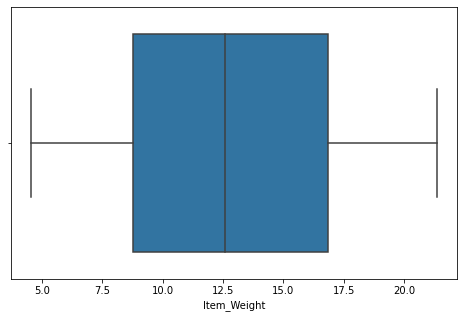

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train_df)

No outliers present for Item_Weight. So we can impute the missing values with Mean

In [21]:
# Imputing Item_Weight (numerical) null values to mean values
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())

In [22]:
train_df['Item_Weight'].isnull().sum()

0

Test Data

In [23]:
print(test_df[['Item_Weight']].value_counts())

Item_Weight
10.50          57
17.60          53
15.60          48
20.25          47
19.35          46
               ..
6.96            1
8.75            1
7.67            1
4.61            1
5.15            1
Length: 410, dtype: int64


<AxesSubplot:xlabel='Item_Weight'>

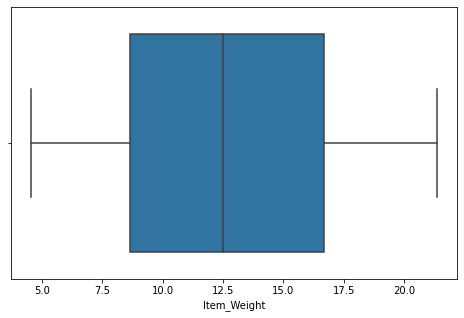

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight', data=test_df)

* No outliers found. So no need to drop outliers. We can continue with imputing if null values are present

In [25]:
# Imputing Item_Weight (numerical) null values to mean values
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Weight'].dropna().mean())

In [26]:
test_df['Item_Weight'].isnull().sum()

0

### 3.2 Outlet_Size Data Imputation Technique

Training Data

In [27]:
train_df['Outlet_Size'].isnull().sum()

2410

In [28]:
# print("Outlet_Size:\n",train_df.Outlet_Size.value_counts())
print(train_df[['Outlet_Size']].value_counts())

Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

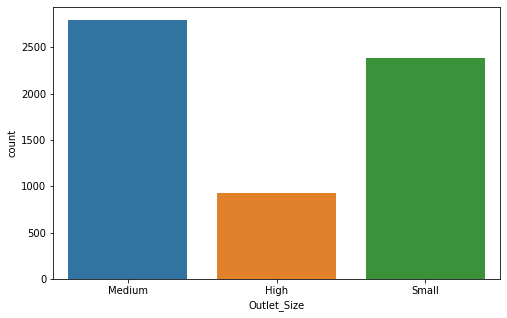

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train_df)

Medium is the highest frequency category for Outlet_Size

In [30]:
# Imputing Outlet_Size (categorical) null values to mode values
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0])
# train_df['Outlet_Size'].mode()[0]

In [31]:
# % of missing/null values in train data
train_df['Outlet_Size'].isnull().sum() 

0

Test Data

In [32]:
test_df['Outlet_Size'].isnull().sum()

1606

In [33]:
print(test_df[['Outlet_Size']].value_counts())

Outlet_Size
Medium         1862
Small          1592
High            621
dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

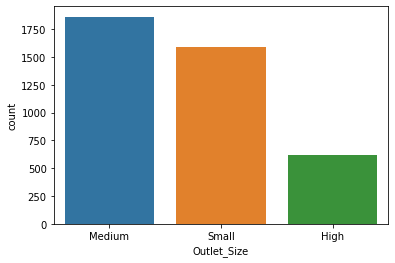

In [34]:
sns.countplot(x='Outlet_Size', data=test_df)

In [35]:
# Medium is the highest frequency category for Outlet_Size
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].dropna().mode()[0])

In [36]:
test_df['Outlet_Size'].isnull().sum()

0

## 4. Exploratory Data Analysis (EDA)

In [37]:
[train_df[num].value_counts().head() for num in numerical[1:]]

[12.857645    1463
 12.150000      86
 17.600000      82
 13.650000      77
 11.800000      76
 Name: Item_Weight, dtype: int64,
 0.000000    526
 0.076975      3
 0.162462      2
 0.076841      2
 0.073562      2
 Name: Item_Visibility, dtype: int64,
 172.0422    7
 170.5422    6
 196.5084    6
 188.1872    6
 142.0154    6
 Name: Item_MRP, dtype: int64,
 1985    1463
 1987     932
 1999     930
 1997     930
 2004     930
 Name: Outlet_Establishment_Year, dtype: int64,
 958.7520     17
 1342.2528    16
 703.0848     15
 1845.5976    15
 1278.3360    14
 Name: Item_Outlet_Sales, dtype: int64]

In [38]:
[train_df[cat].value_counts().head() for cat in categorical[1:]]

[FDW13    10
 FDG33    10
 NCY18     9
 FDD38     9
 DRE49     9
 Name: Item_Identifier, dtype: int64,
 Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type, dtype: int64,
 Supermarket Type1    5577
 Grocery Store        1083
 Supermarket Type3     935
 Supermarket Type2     928
 Name: Outlet_Type, dtype: int64]

In [39]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Item_Fat_Content

In [41]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [42]:
test_df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             3396
Regular             1935
LF                   206
reg                   78
low fat               66
dtype: int64

Some entries of Low Fat marked as LF, low fat.
Similarly Regular is marked as reg. We need to fix this.

In [43]:
test_df['Item_Fat_Content'].unique().tolist()

['Low Fat', 'reg', 'Regular', 'LF', 'low fat']

In [44]:
train_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
train_df['Item_Fat_Content']=train_df['Item_Fat_Content'].astype(str)

In [45]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

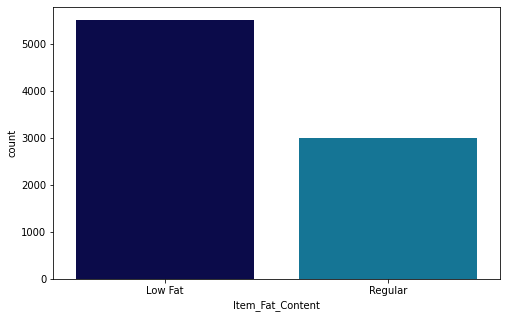

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='Item_Fat_Content', data=train_df, palette='ocean')

In [47]:
test_df['Item_Fat_Content'].replace(['LF','low fat','reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].astype(str)

In [48]:
test_df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             3668
Regular             2013
dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

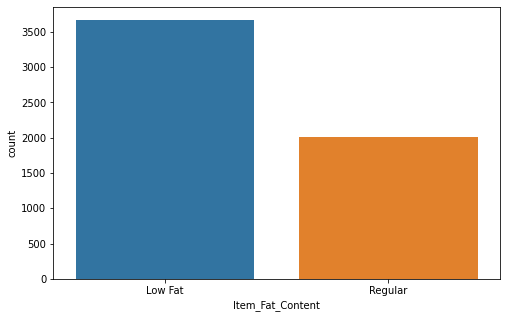

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='Item_Fat_Content', data=test_df)

Low Fat items are bought more

#### Item_Type

In [50]:
train_df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

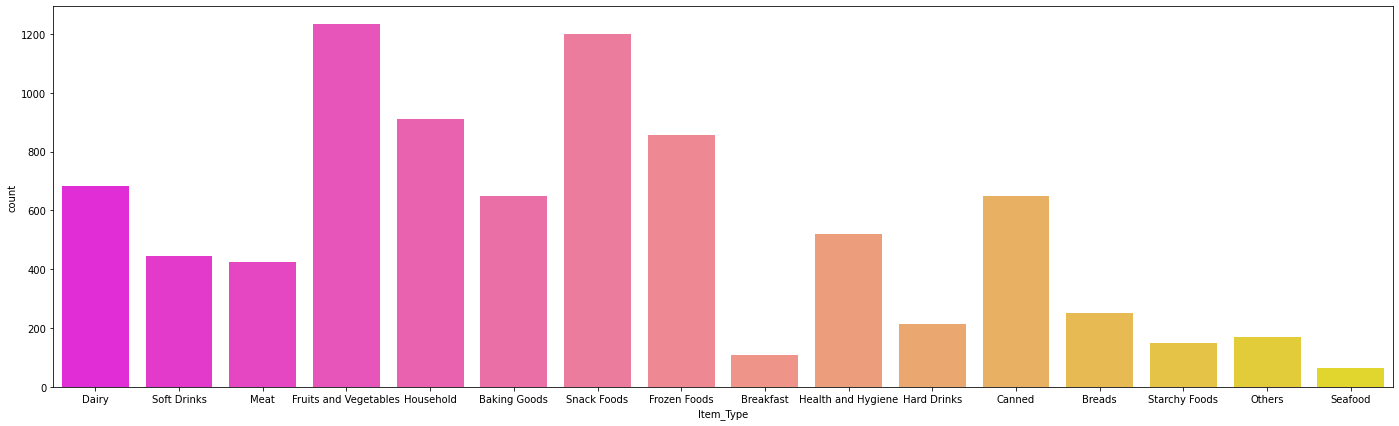

In [51]:
plt.figure(figsize=(24,7))
sns.countplot(x='Item_Type', data=train_df, palette='spring')

In [52]:
test_df['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

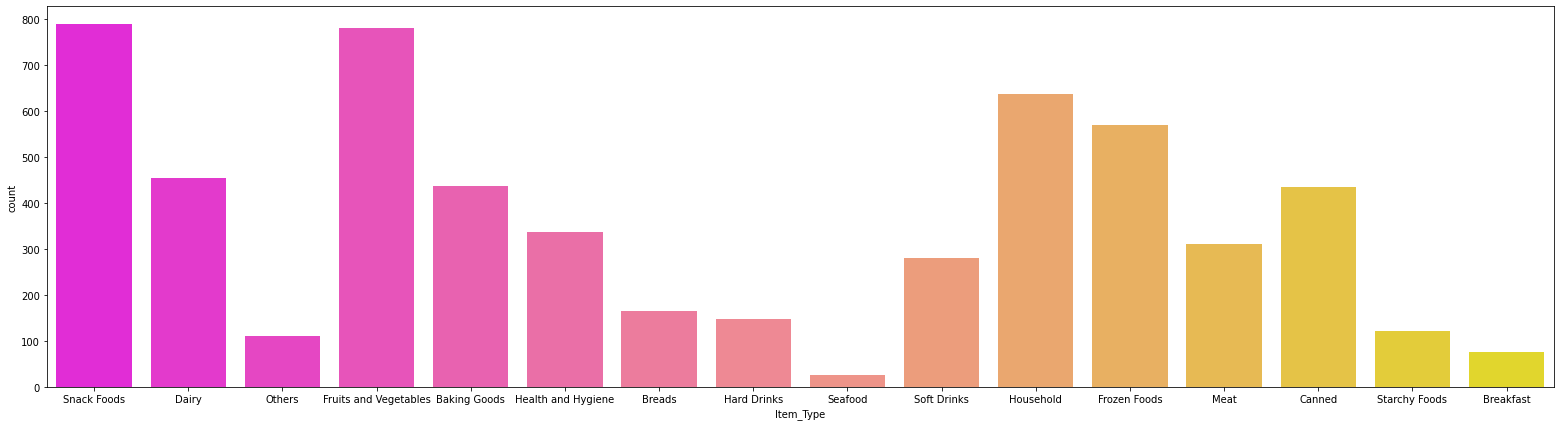

In [53]:
plt.figure(figsize=(27,7))
sns.countplot(x='Item_Type', data=test_df, palette='spring')

Train
* Fruits and Vegetables are sold more as people buy this on daily basis
* Snack Foods also have good sales

#### Outlet_Size

In [54]:
train_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

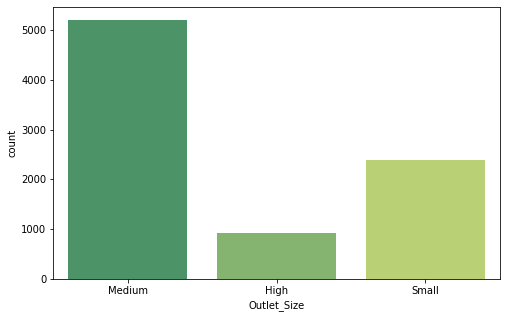

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size', data=train_df, palette='summer')

In [56]:
test_df['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

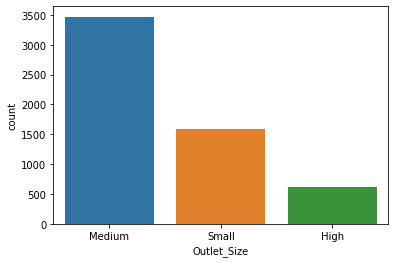

In [57]:
sns.countplot(x='Outlet_Size', data=test_df)

The outlets are more of Medium Size

#### Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

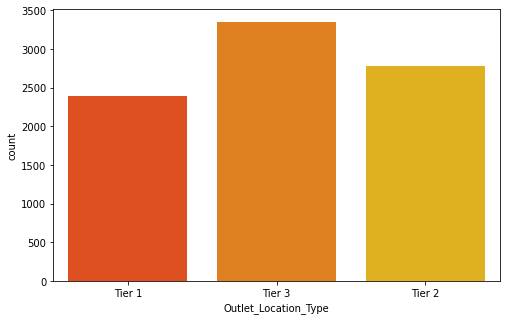

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type', data=train_df, palette='autumn')

In [59]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

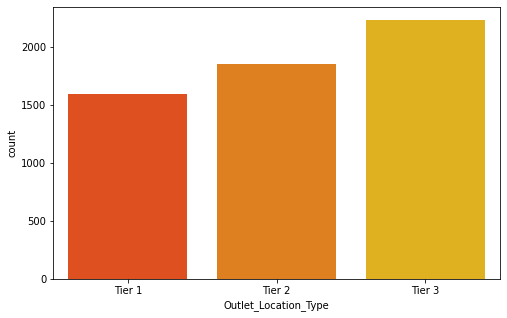

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type', data=test_df, palette='autumn')

In [61]:
test_df['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

Maximum outlets are present in Tier 3 Cities

#### Outlet_Type

In [62]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

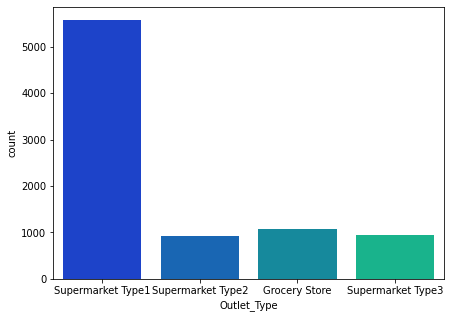

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(x='Outlet_Type', data=train_df, palette='winter')

In [64]:
test_df['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

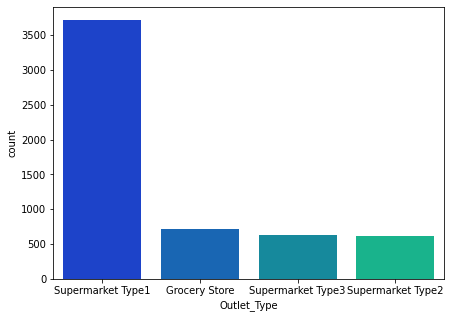

In [65]:
plt.figure(figsize=(7,5))
sns.countplot(x='Outlet_Type', data=test_df, palette='winter')

The Outlets are more of Supermarket Type1

 Item_Type vs Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

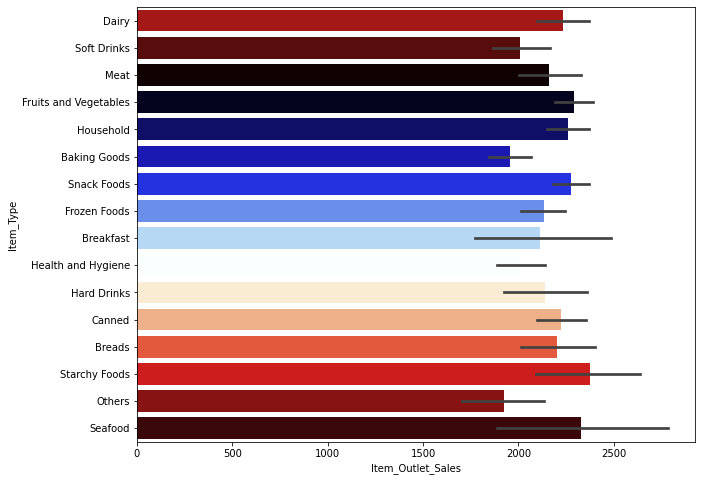

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=train_df,palette='flag')

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers

__MultiVariate Analysis__

Item_Outlet_Sales`:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

In [67]:
multi_plot_cat = categorical.columns.to_list()[2:]
multi_plot_cat

['Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

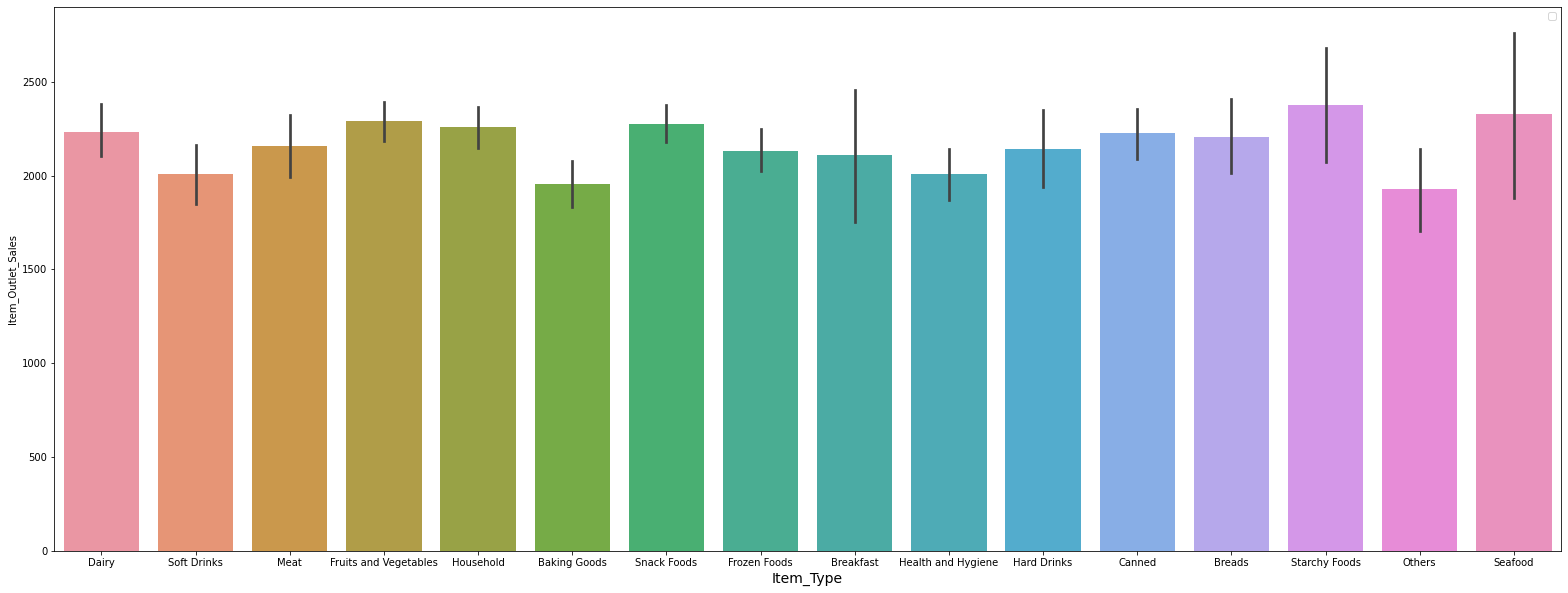

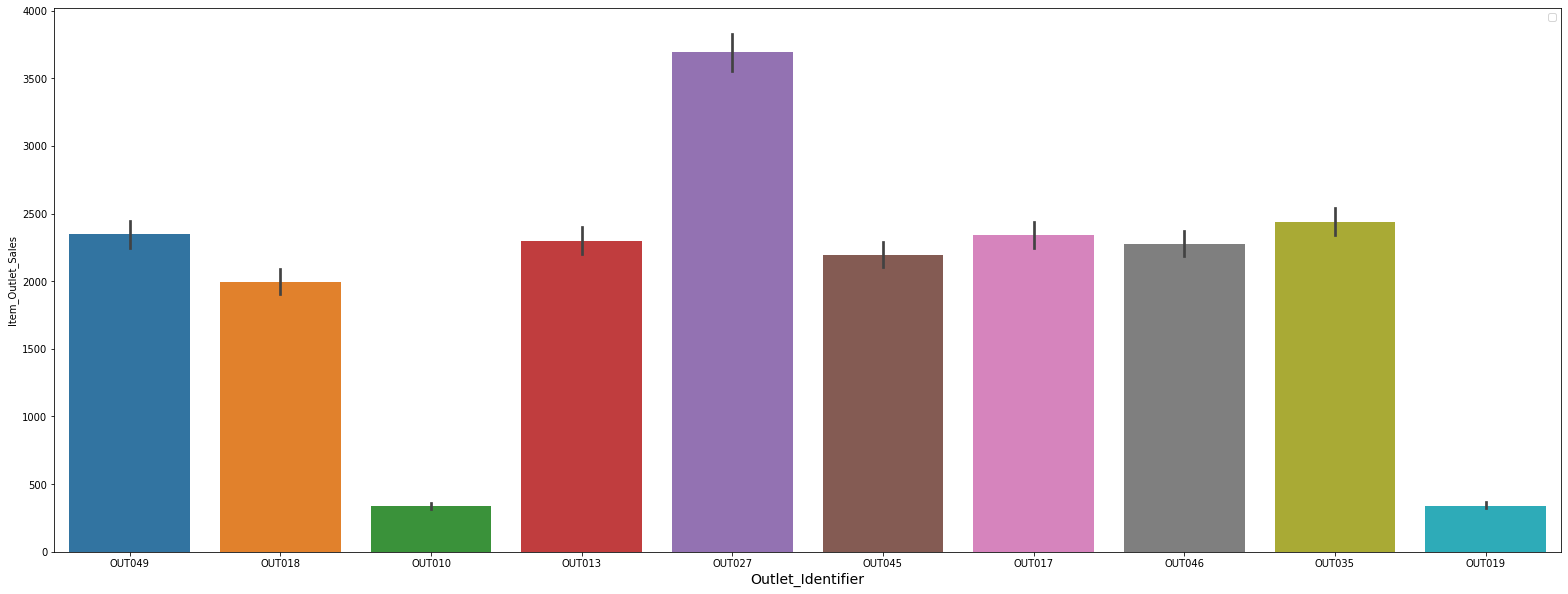

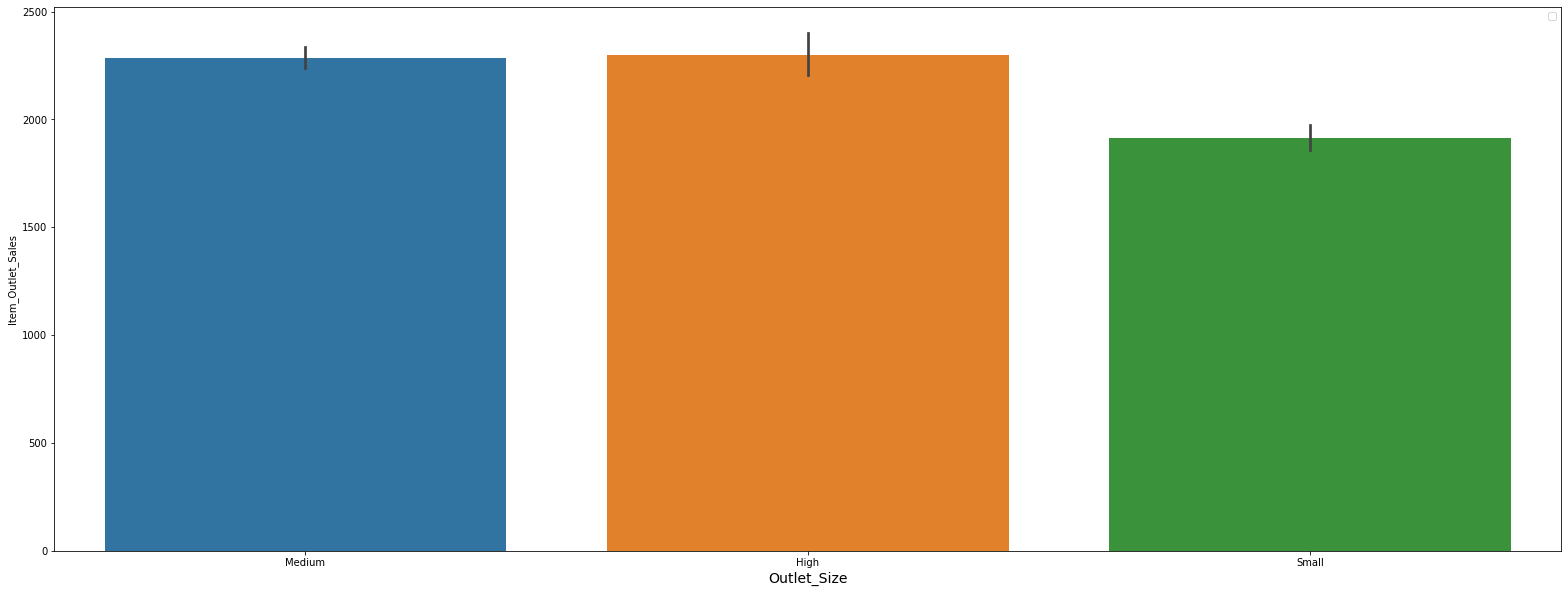

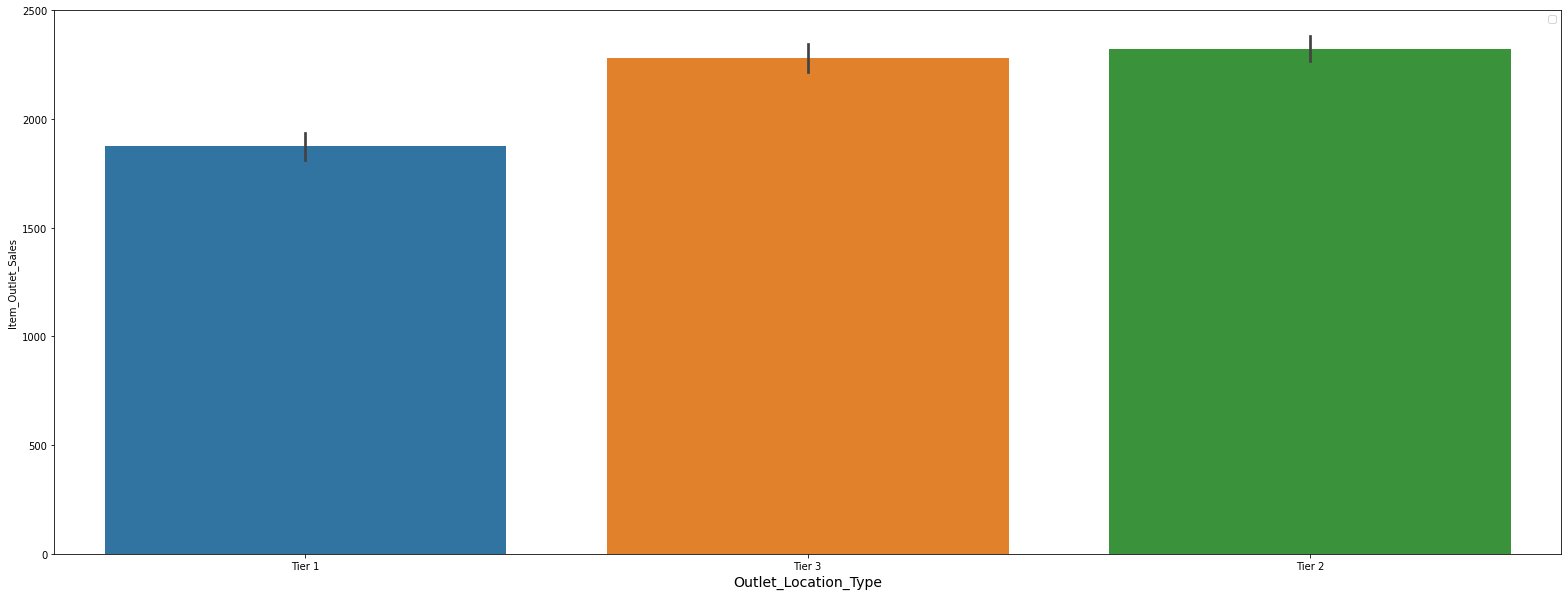

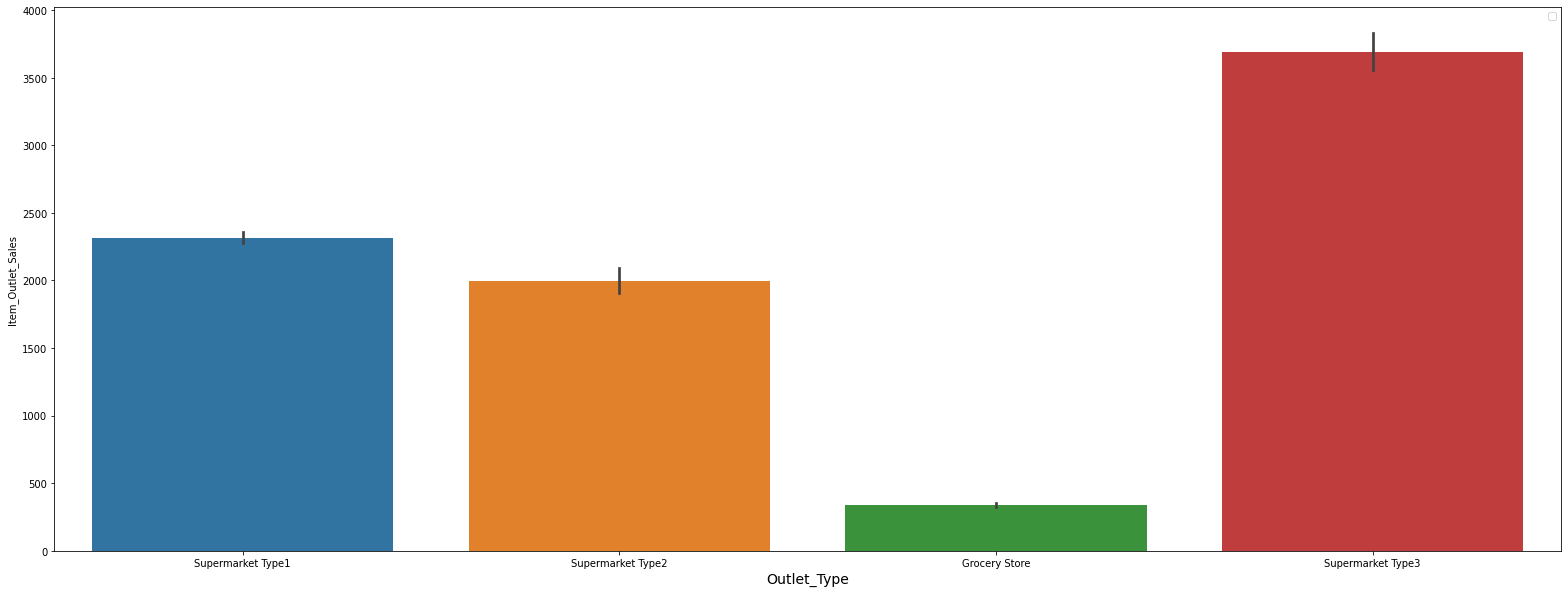

In [68]:
for i in multi_plot_cat:
    plt.figure(figsize=(27,10))
    sns.barplot(x=i, y='Item_Outlet_Sales', data=train_df)
    plt.xlabel(i, fontsize=14)
    plt.legend()
    plt.show()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


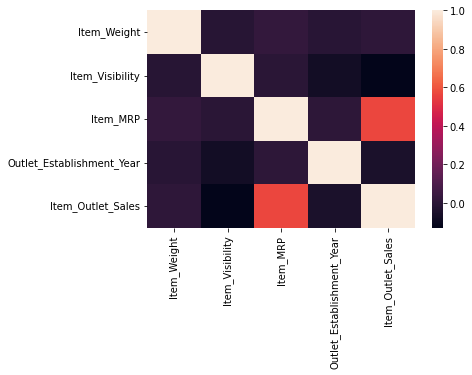

In [69]:
sns.heatmap(train_df.corr(), cmap='rocket')
train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.016380,0.045257,0.013548
Item_Visibility,-0.016380,1.000000,-0.014013,-0.097040
Item_MRP,0.045257,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.013548,-0.097040,-0.007233,1.000000


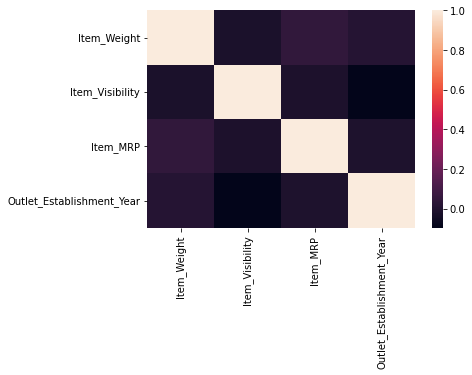

In [70]:
sns.heatmap(test_df.corr(), cmap='rocket')
test_df.corr()

## 5. Feature Engineering

### Numerical Values

#### Outlet_Establishment_Year

In [71]:
train_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [72]:
train_df['Outlet_Years'] = 2022-train_df['Outlet_Establishment_Year']
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [73]:
test_df['Outlet_Years'] = 2022 - train_df['Outlet_Establishment_Year']
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,23
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,13
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,24
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,35


In [74]:
train_df[['Outlet_Years']].value_counts()

Outlet_Years
37              1463
35               932
18               930
23               930
25               930
20               929
13               928
15               926
24               555
dtype: int64

In [75]:
test_df[['Outlet_Years']].value_counts()

Outlet_Years
37              944
20              649
25              634
18              633
35              630
15              616
13              605
23              603
24              367
dtype: int64

### Categorical Values

> Ordinal

#### Item_Fat_Content

Creating Item_ID_Type_Combined from Item_Identifier using Item_Type to categorize

In [76]:
train_df['Item_ID_Type_Combined'] = train_df['Item_Identifier'].apply(lambda x:x[:2])
train_df['Item_ID_Type_Combined'] = train_df['Item_ID_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_ID_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,Non-Consumable


In [77]:
test_df['Item_ID_Type_Combined'] = test_df['Item_Identifier'].apply(lambda x:x[:2])
test_df['Item_ID_Type_Combined'] = test_df['Item_ID_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_ID_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,23,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,13,Food
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,23,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,24,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,35,Food


In [78]:
train_df['Item_ID_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_ID_Type_Combined, dtype: int64

In [79]:
test_df['Item_ID_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_ID_Type_Combined, dtype: int64

__Modify categories of Item_Fat_Content__

In [80]:
train_df.loc[train_df['Item_ID_Type_Combined']=="Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
train_df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [81]:
test_df.loc[test_df['Item_ID_Type_Combined']=="Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
test_df['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

### Numerical and One hot encoding of Categorical variables

In [82]:
# Count the number of unique values
categorical.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [83]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_ID_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,Non-Consumable


In [84]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_ID_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,23,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,13,Food
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,23,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,24,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,35,Food


In [85]:
le = LabelEncoder()

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_ID_Type_Combined','Outlet_Type','Outlet_Identifier']
for i in var_mod:
    train_df[i] = le.fit_transform(train_df[i])
    test_df[i] = le.fit_transform(test_df[i])

In [86]:
train_df.shape

(8523, 14)

In [87]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_ID_Type_Combined
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,23,1
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,13,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,23,1
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,24,1
4,NCD19,8.93,1,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,35,2


In [88]:
categorical.columns.to_list()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [89]:
# One Hot Encoding
train_df = pd.get_dummies(train_df, columns=categorical.columns.to_list()[1:])

In [90]:
print(train_df.shape)
# print(train_df.columns)

(8523, 47)


In [91]:
cat_test.columns.to_list()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [92]:
test_df = pd.get_dummies(test_df, columns=cat_test.columns.to_list()[1:])

In [93]:
print(test_df.shape)
# print(train_df.columns)

(5681, 46)


## 6. Machine Learning Model

In [94]:
train_df = train_df.select_dtypes(exclude='object')
train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_ID_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.016047,249.8092,1999,3735.1380,23,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,13,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,23,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,24,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,35,2,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [95]:
train_df.shape

(8523, 46)

In [96]:
test_df = test_df.select_dtypes(exclude='object')
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_ID_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_Baking Goods,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,20.750000,0.007565,107.8622,1999,23,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,13,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,23,2,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,24,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,35,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [97]:
test_df.shape

(5681, 45)

In [98]:
# Features and Target
X = train_df.drop(columns= ['Item_Outlet_Sales'], axis=1)
y = train_df['Item_Outlet_Sales']

In [99]:
# 20% of data is set aside for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [100]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((6818, 45), (1705, 45), (6818,), (1705,))

In [101]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_ID_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_Baking Goods,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
6594,14.00,0.037581,162.6526,1999,23,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4942,17.70,0.135306,183.7924,1999,23,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4632,8.85,0.053822,183.8292,1987,35,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5846,15.60,0.081563,112.7544,2007,15,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
6760,12.60,0.041727,122.0072,2009,13,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [102]:
def cross_val(model_name,model,X,y,cv):    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [103]:
# Model Building
features = X_train.columns
LinRegModel = LinearRegression(normalize=True, fit_intercept=True)
LinRegModel.fit(X_train, y_train)

train_score=LinRegModel.score(X_train,y_train)
test_score=LinRegModel.score(X_test,y_test)

print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

y_predict = LinRegModel.predict(X_test)
coef = pd.Series(LinRegModel.coef_, features).sort_values()
coef.head(10)

Train Score (R-Squared):  0.5693315126262525
Test Score (R-Squared) 0.5406901704393552


Outlet_Type_1                  -1.663271e+15
Outlet_Type_2                  -1.293111e+15
Outlet_Size_1                  -1.225274e+15
Item_Type_Household            -1.206997e+15
Item_Type_Health and Hygiene   -1.206997e+15
Item_Type_Others               -1.206997e+15
Outlet_Identifier_4            -9.779908e+14
Outlet_Type_0                  -6.907283e+14
Outlet_Identifier_6            -6.423994e+14
Outlet_Identifier_8            -3.863360e+14
dtype: float64

In [104]:
#score variables
LR_MAE = round(metrics.mean_absolute_error(y_test, y_predict),2)
LR_MSE = round(metrics.mean_squared_error(y_test, y_predict),2)
LR_R_2 = round(metrics.r2_score(y_test, y_predict),4)
LR_CS  = round(CVS(LinRegModel, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LinRegModel,LinearRegression(),X,y,5)

 Mean Absolute Error: 880.62

 Mean Squared Error: 1419416.14

 R^2 Score: 0.5407

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(normalize=True) score: 0.5587


<AxesSubplot:>

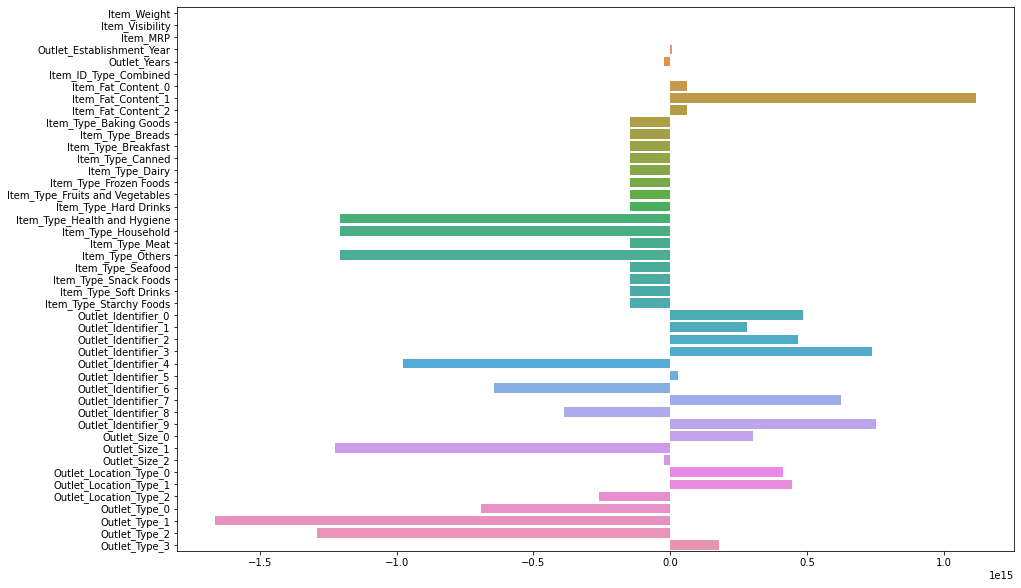

In [105]:
plt.figure(figsize=(15,10))
sns.barplot(LinRegModel.coef_, features)

In [106]:
LinearRegressionTrainOutput = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})
LinearRegressionTrainOutput.to_csv("Linear Regression Train.csv")

Predicting the values for the Test Data

In [107]:
test_df.shape

(5681, 45)

In [108]:
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_ID_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_Baking Goods,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,20.750000,0.007565,107.8622,1999,23,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,13,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,23,2,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,24,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,35,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [109]:
features_test = test_df.columns
y_predict_test = LinRegModel.predict(test_df)
y_predict_test.shape

(5681,)

In [110]:
test_df['Item_Outlet_Sales']=y_predict_test

In [111]:
test_df.shape

(5681, 46)

In [112]:
LinearRegressionTestOutput = test_df
LinearRegressionTestOutput.to_csv("Linear Regression Test.csv")